# Chapter 1 — The Python Data Model

**Sections with code snippets in this chapter:**

* [A Pythonic Card Deck](#A-Pythonic-Card-Deck)
* [Emulating Numeric Types](#Emulating-Numeric-Types)

## A Pythonic Card Deck

#### Example 1-1. A deck as a sequence of playing cards

In [1]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()

    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]

    def __len__(self):
        return len(self._cards)

    def __getitem__(self, position):
        return self._cards[position]

In [9]:
beer_card = Card('7', 'diamonds')
beer_card

Card(rank='7', suit='diamonds')

In [12]:
deck = FrenchDeck()
len(deck)

52

In [13]:
deck[0]

Card(rank='2', suit='spades')

In [14]:
deck[-1]

Card(rank='A', suit='hearts')

In [15]:
# NBVAL_IGNORE_OUTPUT
from random import choice

choice(deck)

Card(rank='9', suit='hearts')

In [16]:
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [17]:
deck[12::13]

[Card(rank='A', suit='spades'),
 Card(rank='A', suit='diamonds'),
 Card(rank='A', suit='clubs'),
 Card(rank='A', suit='hearts')]

In [19]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]
a[::2]

[1, 3, 5, 7, 9]

In [18]:
for card in deck:
    print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='3', suit='diamonds')
Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='8', sui

In [10]:
for card in reversed(deck):
    print(card)

Card(rank='A', suit='hearts')
Card(rank='K', suit='hearts')
Card(rank='Q', suit='hearts')
Card(rank='J', suit='hearts')
Card(rank='10', suit='hearts')
Card(rank='9', suit='hearts')
Card(rank='8', suit='hearts')
Card(rank='7', suit='hearts')
Card(rank='6', suit='hearts')
Card(rank='5', suit='hearts')
Card(rank='4', suit='hearts')
Card(rank='3', suit='hearts')
Card(rank='2', suit='hearts')
Card(rank='A', suit='clubs')
Card(rank='K', suit='clubs')
Card(rank='Q', suit='clubs')
Card(rank='J', suit='clubs')
Card(rank='10', suit='clubs')
Card(rank='9', suit='clubs')
Card(rank='8', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='2', suit='clubs')
Card(rank='A', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(r

In [11]:
Card('Q', 'hearts') in deck

True

In [12]:
Card('7', 'beasts') in deck

False

In [13]:
suit_values = dict(spades=3, hearts=2, diamonds=1, clubs=0)

def spades_high(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]

for card in sorted(deck, key=spades_high):
    print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

## Emulating Numeric Types

#### Example 1-2. A simple two-dimensional vector class

In [14]:
import math

class Vector:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __repr__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

In [15]:
v1 = Vector(2, 4)
v2 = Vector(2, 1)
v1 + v2

Vector(4, 5)

In [16]:
v = Vector(3, 4)
abs(v)

5.0

In [17]:
v * 3

Vector(9, 12)

In [18]:
abs(v * 3)

15.0

the !r conversion field in Python is used to get the standard representation of an object, which is useful for debugging and logging.

In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Vector({self.x!r}, {self.y!r})"

v = Vector(1, 2)
print(f"{v}")  # Output: Vector(1, 2)

Vector(1, 2)


In [ ]:
v = Vector("1", "2")
print(f"{v}")  # Output: Vector('1', '2')

Vector('1', '2')


In [ ]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

v = Vector("1", "2")
print(f"{v!r}") # Vector(1, 2)

Vector(1, 2)


The __repr__ special method is called by the repr built-in to get the string representation of the object for inspection. Without a custom __repr__, Python’s console would display a Vector instance <Vector object at 0x10e100070>.

In [26]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # def __repr__(self):
    #     return f"Vector({self.x}, {self.y})"

v = Vector("1", "2")
print(f"{v!r}") # Vector(1, 2)

Sometimes same string returned by __repr__ is user-friendly, and you don’t need to code __str__ because the implementation inherited from the object class calls __repr__ as a fallback.

In [27]:
class Test:
    def __repr__(self):
        return "Test1"
    def __str__(self):
        return "Test2"

t = Test()
print(t)  # Output: Test2
print(repr(t))  # Output: Test1

Test2
Test1


In [ ]:
class Test:
    def __repr__(self):
        return "Test1"
    # def __str__(self):
    #     return "Test2"

t = Test()
print(t)  # Output: Test1
print(repr(t))  # Output: Test1

Test1
Test1


In [ ]:
class Test:
    # def __repr__(self):
    #     return "Test1"
    def __str__(self):
        return "Test2"

t = Test()
print(t)  # Output: Test2
print(repr(t))  # <__main__.Test object at 0x000002458A8B92D0>

Test2


surprisingly, was too succinct.

First, let me reiterate the main points in Alex’s post:

The default implementation is useless (it’s hard to think of one which wouldn’t be, but yeah)
__repr__ goal is to be unambiguous
__str__ goal is to be readable

My rule of thumb: __repr__ is for developers, __str__ is for customers.

In [31]:
import datetime
today = datetime.datetime.now()
print(str(today))
# '2012-03-14 09:21:58.130922'
print(repr(today))
# 'datetime.datetime(2012, 3, 14, 9, 21, 58, 130922)'

2025-03-27 20:51:28.906940
datetime.datetime(2025, 3, 27, 20, 51, 28, 906940)


By default, instances of user-defined classes are considered truthy, unless either __bool__ or __len__ is implemented. Basically, bool(x) calls x.__bool__() and uses the result. If __bool__ is not implemented, Python tries to invoke x.__len__(), and if that returns zero, bool returns False. Otherwise bool returns True.

In [ ]:
class Test:
    def __bool__(self):
        return True
    def __len__(self):
        return 0

t = Test()
print(bool(t))  # Output: True

True


In [ ]:
class Test:
    # def __bool__(self):
    #     return True
    def __len__(self):
        return 0

t = Test()
print(bool(t))  # Output: false 

False


constants defined to be false: None and False

zero of any numeric type: 0, 0.0, 0j, Decimal(0), Fraction(0, 1)

empty sequences and collections: '', (), [], {}, set(), range(0)

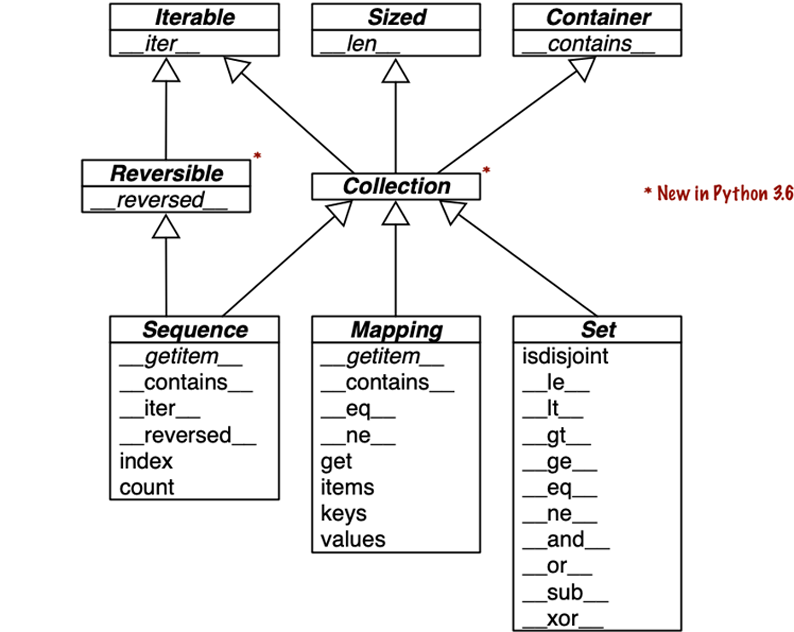

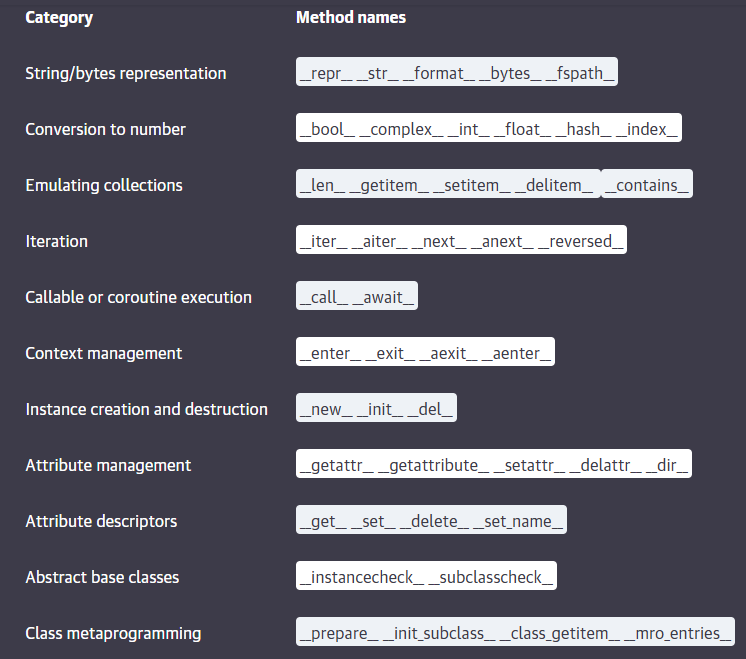